# Smart Study Coach — Data Exploration, Cleaning & Recommendation

Inhoud:
1. **Business Understanding & Data Collection** - Formuleert een duidelijke probleemstelling, verantwoordt maatschappelijke relevantie, houdt rekening met ethiek en privacy (EU AI Act 2025/AVG).
2. **Exploratory Data Analysis (EDA) & Dataprocessing** - Voert een systematische verkenning van de dataset uit en maakt deze geschikt voor modellering.
3. **Opschonen dataset** - opschonen `Uitgebreide_VKM_dataset.csv`
4. **Analyse op Schonen dataset** - analyse van de schonen data, counts (unique tags, locations), en error rate per kolom.
5. **NLP & Recommendation Engine** - text cleaning, TF-IDF vectorization, cosine similarity and a `recommend()` helper.
6. **Model Optimization & Performance Tuning** - todo
7. **Demo** - todo



# Business Understanding & Data Collection

**Probleemstelling**

Binnen het huidige studieprogramma ervaren studenten vaak moeilijkheden bij het kiezen van een passende vrije keuzemodule (VKM). Het aanbod is groot, de beschikbare informatie is verspreid, en de begeleiding bij het maken van keuzes is beperkt. Hierdoor nemen studenten soms beslissingen die niet optimaal aansluiten bij hun interesses, waarden of loopbaandoelen.

Het doel van dit project is daarom om een Smart Study Coach te ontwikkelen: een AI-toepassing die studenten ondersteunt bij het maken van correcte keuze van een vrij keuze module. Deze toepassing zal het studentprofiel analyseren en gepersonaliseerde aanbevelingen doen op basis van de overeenkomsten met de beschikbare modules.

**Maatschappelijke relevantie**

Het keuzeproces van studenten heeft een directe invloed op motivatie, studiesucces en welzijn. Door studenten beter te begeleiden, kan deze toepassing bijdragen aan:
1. Hogere studiebetrokkenheid en motivatie.
2. Minder studievertraging of verkeerde keuze.
3. Een beter aansluitend studiepad richting persoonlijke en professionele doelen.

De Smart Study Coach draagt bij aan de bredere maatschappelijke trend van verantwoorde AI in het onderwijs, waarin technologie wordt ingezet om gelijke kansen en persoonlijke ontwikkeling te bevorderen.

**Ethiek en privacy (EU AI Act 2025 / AVG)**

Bij het ontwikkelen van een AI-systeem voor studieadvies moet goed worden opgelet dat alles volgens de ethische en wettelijke regels gebeurt. De volgende principes, die direct of indirect voortkomen uit de EU AI Act 2025 en de AVG, sluiten goed aan op ons AI-systeem:
1. Transparantie & uitlegbaarheid: De aanbevelingen van de Smart Study Coach moeten begrijpelijk en uitlegbaar zijn, zodat studenten weten waarom een module wordt voorgesteld.
2. Privacy by Design: Persoonlijke gegevens van studenten (zoals interesses of waarden) worden uitsluitend gebruikt voor het aanbevelingsdoel en veilig opgeslagen volgens de AVG-richtlijnen.
3. Data-minimisatie: Er wordt enkel data verzameld die strikt noodzakelijk is voor het functioneren van het model.
4. Menselijke controle: De uiteindelijke keuze blijft altijd bij de student; de AI dient als ondersteunend instrument, niet als beslisser.

## Deel 1 — Data Exploratie (EDA) & Dataprocessing
We beginnen met het lade van de dataset en dan korte analyse:
- aantal unieke tags (`module_tags`)
- aantal modules per `location`
- kolom counts of empty / weird / ntb values (pre-cleaning)


In [417]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Ensure stopwords are downloaded
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

# Load dataset
raw_path = "Uitgebreide_VKM_dataset.csv"
df_raw = pd.read_csv(raw_path)
print(f"Loaded dataset with {len(df_raw)} rows and {len(df_raw.columns)} columns")

# Setup Stopwords for Tags (Dutch + English)
stop_words = set(stopwords.words('english')) | set(stopwords.words('dutch'))
# Add specific noise words if necessary
extra_noise = {"ntb", "nan", "null", "none", "'", "['", "']"} 
stop_words.update(extra_noise)

Loaded dataset with 211 rows and 20 columns


Column analysis (pre-cleaning):


,column,empty_values,empty_%,weird_values,weird_%,ntb,ntb_%,general_error_total,general_error_%
12,Blauw,209,99.05,0,0.00,0,0.00,209,99.05
13,Geel,209,99.05,0,0.00,0,0.00,209,99.05
11,Groen,209,99.05,0,0.00,0,0.00,209,99.05
10,Rood,209,99.05,0,0.00,0,0.00,209,99.05
9,learningoutcomes,5,2.37,33,15.64,26,12.32,64,30.33
2,shortdescription,20,9.48,0,0.00,10,4.74,30,14.22
14,module_tags,0,0.00,10,4.74,0,0.00,10,4.74
3,description,0,0.00,6,2.84,2,0.95,8,3.79
4,content,0,0.00,6,2.84,2,0.95,8,3.79
1,name,0,0.00,0,0.00,0,0.00,0,0.00


Generating Pre-Cleaning Visualizations...


C:\Users\Storm\AppData\Local\Temp\ipykernel_1692\3789853778.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loc_counts.values, y=loc_counts.index, ax=axes[0], palette="viridis")
C:\Users\Storm\AppData\Local\Temp\ipykernel_1692\3789853778.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Tag', data=tags_df, ax=axes[1], palette="magma")


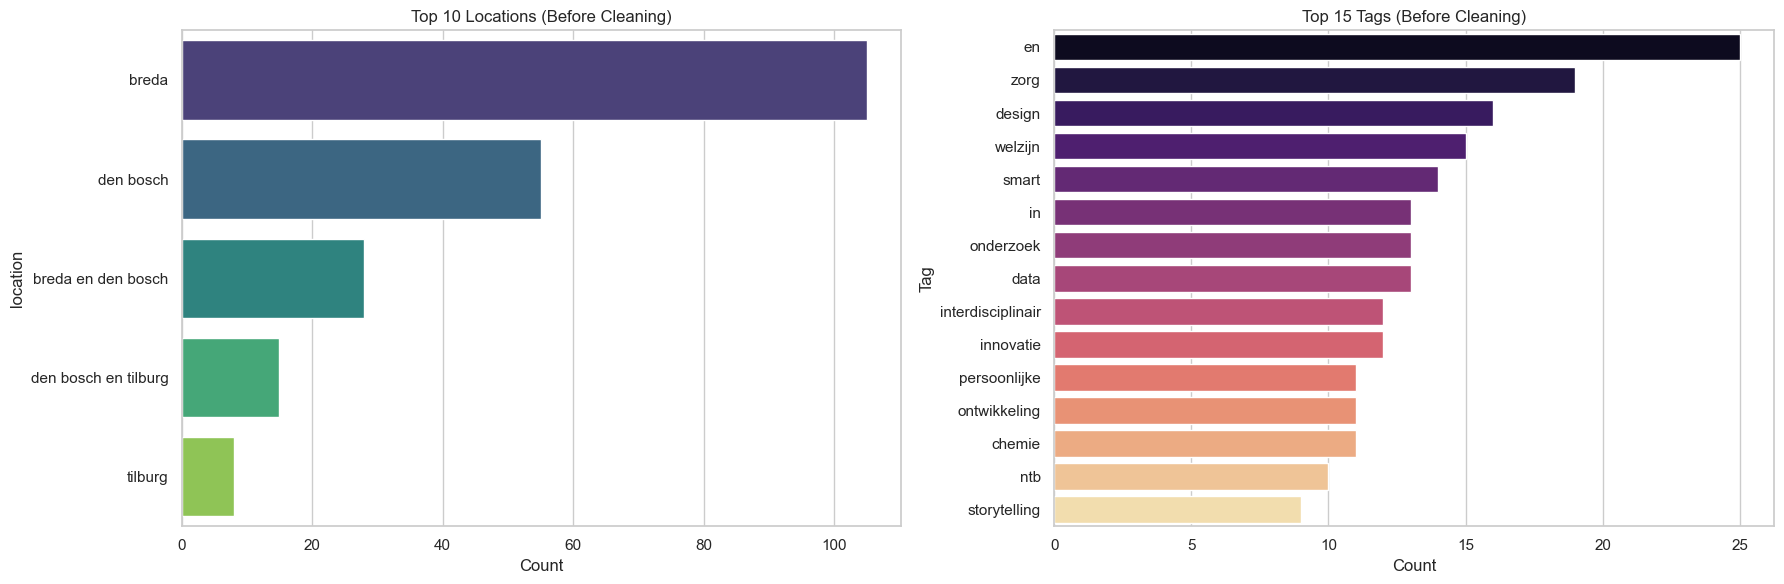

In [418]:
empty_values = ["", "nan", "none", "null", "[]"]
weird_values = [
    "nvt", "volgt", "nader te bepalen", "nog niet bekend",
    "nadert te bepalen", "nog te formuleren", "tbd", "n.n.b.", "navragen", "['ntb']"
]

def is_empty(value):
    if value is None or (isinstance(value, float) and np.isnan(value)):
        return True
    if isinstance(value, str) and value.strip() == "":
        return True
    return False

def is_weird(value):
    if not isinstance(value, str):
        return False
    val = value.lower().strip()
    return any(w in val for w in weird_values)

def is_ntb(value):
    return isinstance(value, str) and value.strip().lower() == "ntb"

def analyze_dataframe_simple(df_in):
    analysis = []
    for col in df_in.columns:
        total = len(df_in[col])
        empty_count = df_in[col].apply(is_empty).sum()
        weird_count = df_in[col].apply(is_weird).sum()
        ntb_count = df_in[col].apply(is_ntb).sum()
        general_error_count = empty_count + weird_count + ntb_count
        general_error_percent = round((general_error_count / total) * 100, 2)
        analysis.append({
            "column": col,
            "empty_values": int(empty_count),
            "empty_%": round((empty_count / total) * 100, 2),
            "weird_values": int(weird_count),
            "weird_%": round((weird_count / total) * 100, 2),
            "ntb": int(ntb_count),
            "ntb_%": round((ntb_count / total) * 100, 2),
            "general_error_total": int(general_error_count),
            "general_error_%": general_error_percent
        })
    analysis_df = pd.DataFrame(analysis).sort_values(by="general_error_%", ascending=False)
    return analysis_df

print("Column analysis (pre-cleaning):")
col_analysis_pre = analyze_dataframe_simple(df_raw)
display(col_analysis_pre)

def visualize_data(df_in, title_stage):
    """
    Generates bar charts for Locations and Top Tags.
    """
    sns.set_theme(style="whitegrid")
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    
    # --- 1. Location Analysis ---
    if 'location' in df_in.columns:
        loc_counts = df_in['location'].fillna('ntb').astype(str).str.lower().value_counts().head(10)
        sns.barplot(x=loc_counts.values, y=loc_counts.index, ax=axes[0], palette="viridis")
        axes[0].set_title(f"Top 10 Locations ({title_stage})")
        axes[0].set_xlabel("Count")
    
    # --- 2. Tag Analysis ---
    if 'module_tags' in df_in.columns:
        tags_series = df_in['module_tags'].fillna('')
        all_tags = []
        
        for t in tags_series.astype(str):
            # Clean string representation of list to actual words
            # Remove brackets, quotes, and split by comma
            cleaned = re.sub(r"[\[\]']", "", t) 
            parts = cleaned.split(',')
            for p in parts:
                p = p.strip().lower()
                # Basic filtering for the plot (ignoring raw empty strings)
                if p and len(p) > 1:
                    all_tags.append(p)
                    
        # Count and plot
        tag_counts = Counter(all_tags).most_common(15)
        if tag_counts:
            tags_df = pd.DataFrame(tag_counts, columns=['Tag', 'Count'])
            sns.barplot(x='Count', y='Tag', data=tags_df, ax=axes[1], palette="magma")
            axes[1].set_title(f"Top 15 Tags ({title_stage})")
        else:
            axes[1].text(0.5, 0.5, "No Tags Found", ha='center')
            
    plt.tight_layout()
    plt.show()

# Run Visualization on Raw Data
print("Generating Pre-Cleaning Visualizations...")
visualize_data(df_raw, title_stage="Before Cleaning")



## Conclusie
De initiële analyse van de ruwe dataset (211 rijen) onthult enkele kritieke datakwaliteitsproblemen die de modellering direct beïnvloeden:

* **Irrelevante Kolommen:** De kolommen `Rood`, `Groen`, `Blauw` en `Geel` bevatten bijna uitsluitend (99.05%) lege waarden. Dit maakt ze irrelevant voor het aanbevelingsmodel, en ze worden daarom verwijderd.
* **Aanpak 'Learning Outcomes':** De kolom `learningoutcomes` bevat de hoogste concentratie aan fouten (30.33%), voornamelijk 'weird' en 'ntb' waarden. Dit vereist normalisatie, maar het hoge percentage aan missende data betekent dat dit veld voor een aanzienlijk deel van de modules onbruikbaar zal blijven.
* **Korte Beschrijving Imputatie:** De kolom `shortdescription` heeft een significant aantal missende waarden (14.22%), wat de kwaliteit van de gecombineerde tekst voor TF-IDF zou verminderen. De 'smart fill'-strategie is essentieel om deze gaten op te vullen met data uit `description` en `content`.
* **Tags en Beschrijvingen:** De kerndata voor de aanbevelingsengine, zoals `module_tags`, `description` en `content`, bevatten relatief weinig fouten (<5%), maar de aanwezige 'weird' waarden in de tags-kolom moeten gestandaardiseerd worden.

De vervolgstappen zullen zich richten op het verwijderen van irrelevante data en het intelligent imputeren en normaliseren van de tekstkolommen om een rijke en schone `combined_text` kolom te garanderen.

---
## Deel 2 — Opschoning & Voorbereiding
We voeren de opschoningsstappen uit met uitleg. De strategie is:
1. Verwijder irrelevante kolommen (de kleuren) indien aanwezig.
2. Normaliseer waarden naar string, kleine letters en trim.
3. Vervang letterlijke lege indicatoren door `ntb` (Nader Te Bepalen).
4. Pas een veilige regex-vervanging toe voor bekende 'weird' zinnen (alleen als de celinhoud precies overeenkomt met een van deze zinnen).
5. Vul `shortdescription` slim op met de eerste zinnen uit `description` en `content` waar beschikbaar.


Removing stopwords from module_tags...
Filling shortdescription using description/content where needed...

Analysis after cleaning:


,column,empty_values,empty_%,weird_values,weird_%,ntb,ntb_%,general_error_total,general_error_%
9,learningoutcomes,0,0.0,2,0.95,62,29.38,64,30.33
10,module_tags,0,0.0,0,0.00,30,14.22,30,14.22
3,description,0,0.0,4,1.90,4,1.90,8,3.79
4,content,0,0.0,4,1.90,4,1.90,8,3.79
2,shortdescription,0,0.0,2,0.95,2,0.95,4,1.90
5,studycredit,0,0.0,0,0.00,0,0.00,0,0.00
0,id,0,0.0,0,0.00,0,0.00,0,0.00
1,name,0,0.0,0,0.00,0,0.00,0,0.00
7,contact_id,0,0.0,0,0.00,0,0.00,0,0.00
6,location,0,0.0,0,0.00,0,0.00,0,0.00


Generating Post-Cleaning Visualizations...


C:\Users\Storm\AppData\Local\Temp\ipykernel_1692\3789853778.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loc_counts.values, y=loc_counts.index, ax=axes[0], palette="viridis")
C:\Users\Storm\AppData\Local\Temp\ipykernel_1692\3789853778.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Tag', data=tags_df, ax=axes[1], palette="magma")


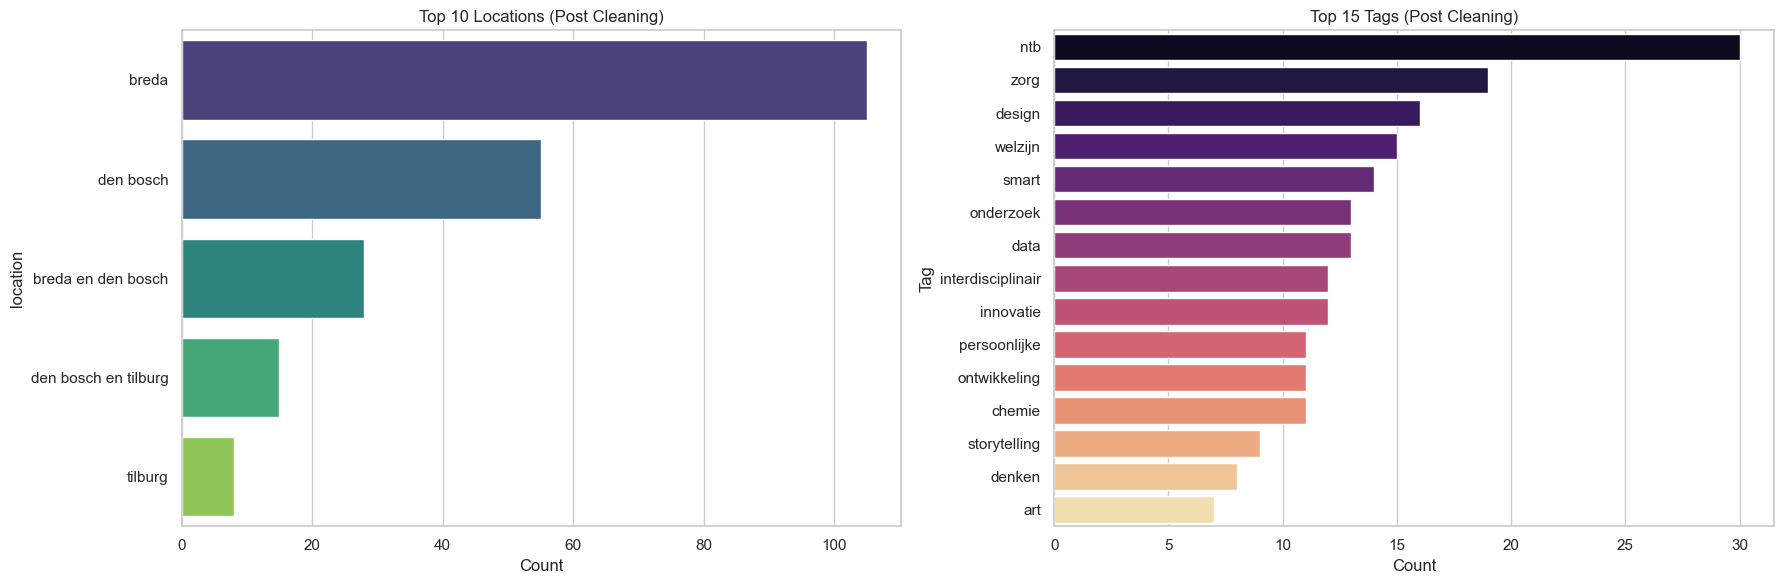

Cleaned file written to: Uitgebreide_VKM_dataset_zonder_weird_data.csv


In [419]:
df = df_raw.copy()
cols_to_drop = ["Rood", "Groen", "Blauw", "Geel"]
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

# Convert to string (safe for TF-IDF later) and normalize
df = df.fillna('')
for col in df.columns:
    # Cast to string for consistent processing
    df[col] = df[col].astype(str)
    df[col] = df[col].str.lower().str.strip()

# Replace explicit empty-like strings with 'ntb'
for val in empty_values:
    df.replace(val, 'ntb', inplace=True)

# Safe regex for weird_values: only replace if the entire cell equals the weird phrase
safe_pattern = r'^\s*(' + '|'.join([re.escape(v) for v in weird_values]) + r')\s*$'
for col in df.columns:
    df[col] = df[col].replace(to_replace=safe_pattern, value='ntb', regex=True)

# Specific Tag Cleaning (Stopword Removal)
def clean_tags_column(tag_string):
    if tag_string == 'ntb': return 'ntb'
    
    # 1. Remove list characters like [ ] ' "
    clean_str = re.sub(r"[\[\]'\"]", "", tag_string)
    
    # 2. Split by comma
    tags = clean_str.split(',')
    
    valid_tags = []
    for tag in tags:
        tag = tag.strip().lower()
        # 3. Filter: Must not be a stopword, must be > 1 char, must not be numeric
        if tag and tag not in stop_words and len(tag) > 1 and not tag.isdigit():
            valid_tags.append(tag)
            
    # Return as a clean comma-separated string (easier for reading) 
    # or keep as list string if preferred. Here we join them.
    return ", ".join(valid_tags) if valid_tags else "ntb"

print("Removing stopwords from module_tags...")
df['module_tags'] = df['module_tags'].apply(clean_tags_column)

# Smart fill for shortdescription
def fill_short_smart(row):
    short = row.get('shortdescription', 'ntb')
    if short and short != 'ntb':
        return short
    desc = row.get('description', 'ntb')
    content = row.get('content', 'ntb')
    valid_desc = desc and desc != 'ntb'
    valid_content = content and content != 'ntb'
    if valid_desc and valid_content:
        if desc == content:
            return desc
        return f"{desc} {content}"
    if valid_desc:
        return desc
    if valid_content:
        return content
    return 'ntb'

if 'shortdescription' in df.columns:
    print("Filling shortdescription using description/content where needed...")
    df['shortdescription'] = df.apply(fill_short_smart, axis=1)
else:
    print("No shortdescription column found; skipping smart fill.")

print('\nAnalysis after cleaning:')
col_analysis_post = analyze_dataframe_simple(df)
display(col_analysis_post)

print("Generating Post-Cleaning Visualizations...")
visualize_data(df, title_stage="Post Cleaning")


# Save cleaned file
out_path = 'Uitgebreide_VKM_dataset_zonder_weird_data.csv'
df.to_csv(out_path, index=False)
print(f"Cleaned file written to: {out_path}")


### Conclusie van de Opgeschoonde Data-analyse (Post-Opschoning)

Na het doorlopen van de opschoningspijplijn is de datakwaliteit aanzienlijk verbeterd, wat de betrouwbaarheid van het aanbevelingsmodel ten goede komt:

* **Kritieke Verbetering:** De kolom `shortdescription` is sterk verbeterd, met het foutpercentage gereduceerd van 14.22% naar slechts 1.90%. Dit bewijst de effectiviteit van de 'smart fill'-strategie, waardoor waardevolle tekstuele input is behouden.
* **Normalisatie van Fouten:** Alle 'empty' en 'weird' waarden in de tekstkolommen zijn nu gestandaardiseerd naar 'ntb', wat de data consistent maakt voor de NLP-stap. Het foutpercentage in `learningoutcomes` is onveranderd (30.33%), maar de data is wel genormaliseerd.
* **Impact van Stopwoordverwijdering:** De stijging van het foutpercentage in `module_tags` van 4.74% naar 14.22% is een acceptabel neveneffect van het verwijderen van stopwoorden. Dit betekent dat ongeveer 10% van de modules alleen tags bevatte die uit stopwoorden bestonden, wat aangeeft dat deze tags weinig informatieve waarde hadden voor de aanbevelingsengine.
* **Klaar voor NLP:** De resterende kernkolommen (`name`, `description`, `content`, `module_tags`) zijn nu zo schoon en gestandaardiseerd mogelijk, waardoor de dataset optimaal is voor de volgende stap: TF-IDF vectorisatie.

---
## Deel 3 — NLP & Aanbevelingsengine
We schonen de tekst op voor NLP, vectoriseren met behulp van TF-IDF en berekenen cosinusgelijkenis. Uitleg volgt na de cellen.

## Functie voor Gebruikersgebaseerde Aanbevelingen

We introduceren een nieuwe aanbevelingsstrategie die de focus verlegt van **module-tegen-module** gelijkenis naar **gebruikersprofiel-tegen-module** gelijkenis. Dit stelt de gebruiker in staat om gepersonaliseerde aanbevelingen te ontvangen op basis van directe input, zoals favoriete tags en interacties met modules (geliked of overgeslagen). 


In [420]:
from langdetect import detect as lang_detect
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# -----------------------------
# 1. Setup
# -----------------------------
nltk.download("stopwords")

# --------------------------------
# Load raw dataset
# --------------------------------
df_raw = df.copy()   # keep original exactly as provided

# Stopwords: English + Dutch
stop_words = set(stopwords.words("dutch")) | set(stopwords.words("english"))

# Stemmers for both languages
stemmer_en = SnowballStemmer("english")
stemmer_nl = SnowballStemmer("dutch")

def detect_language_safe(text):
    """Safe language detector with fallback."""
    try:
        return lang_detect(text)
    except:
        return "unknown"


# -----------------------------
# 2. Dual-language NLP cleaning
# -----------------------------

def clean_text_nlp(text):
    if not isinstance(text, str) or text.strip() == "" or text.lower() in weird_values or text.lower() == "ntb":
        return ""

    # Raw lowercase
    raw = text.lower()

    # Detect language BEFORE cleaning
    lang = detect_language_safe(raw)

    # Remove unwanted chars AFTER lang detection
    text = re.sub(r"[^a-zA-Záéíóúàèçäëïöüñ\s]", " ", raw)
    text = re.sub(r"\s+", " ", text).strip()

    # Tokenize
    tokens = text.split()

    # Stem depending on language
    if lang == "nl":
        tokens = [stemmer_nl.stem(w) for w in tokens]
    elif lang == "en":
        tokens = [stemmer_en.stem(w) for w in tokens]
    else:
        # fallback to Dutch (dataset majority)
        tokens = [stemmer_nl.stem(w) for w in tokens]

    # Normalize stems (fixes circulariteit vs circulair)
    def normalize_token(tok):
        return tok[:6]  # safe, preserves meaning

    tokens = [normalize_token(t) for t in tokens]

    # Remove stopwords AFTER stemming & normalization
    tokens = [w for w in tokens if w not in stop_words]

    return " ".join(tokens) if tokens else "ntb"


print("Applying EN + NL NLP cleaning...")
# Deep copy to avoid messing up df_raw
df_clean = df_raw.copy()

fields_to_clean = ["name", "shortdescription", "module_tags", "location"]

for col in fields_to_clean:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype(str).apply(clean_text_nlp)


# Lowercase for all object columns
for col in df.columns:
    if df_clean[col].dtype == object:
        df_clean[col] = df_clean[col].str.lower()


# -----------------------------
# 3. Combine fields for TF-IDF
# -----------------------------
df_clean["combined_text"] = (
    df_clean.get("name", "") + " " +
    df_clean.get("shortdescription", "") + " " +
    df_clean.get("module_tags", "") + " " +
    df_clean.get("location", "")
)

df_clean.to_csv("cleaned_combined_vkm_dataset.csv", index=False)

# -----------------------------
# 4. Multi-language TF-IDF + similarity
# -----------------------------
vectorizer = TfidfVectorizer(
    stop_words=list(stop_words),   # EN + NL stopwords
    min_df=1
)

matrix = vectorizer.fit_transform(df_clean["combined_text"])
print(f"TF-IDF matrix shape: {matrix.shape}")

similarities = cosine_similarity(matrix)

similarity_df = pd.DataFrame(
    similarities,
    index=df_raw.get("name", pd.Series(range(len(df)))),
    columns=df_raw.get("name", pd.Series(range(len(df))))
)


Applying EN + NL NLP cleaning...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Storm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


TF-IDF matrix shape: (211, 1158)


### Uitleg van de Aanpak

1.  **Constructie van Gebruikersprofiel (User Profile Vector):**
    * Er wordt een synthetische 'gebruikersmodule' gecreëerd die de voorkeuren van de student vertegenwoordigt.
    * **Positieve Input (Tags & Likes):** De teksten (`combined_text`) van de **gelikede modules** worden verzameld en hieraan worden de **favoriete tags** toegevoegd. Dit maximaliseert de positieve signalen over wat de gebruiker leuk vindt.
    * **Negatieve Input (Skipped Modules):** De overgeslagen modules (`skipped_modules`) worden gebruikt voor **exclusie/filtering**. Ze worden niet in de profieltekst opgenomen, maar de aanbevelingsfunctie zorgt ervoor dat deze modules niet in de uiteindelijke resultaten verschijnen.

2.  **Vectorisatie:** De gecombineerde tekst van het gebruikersprofiel wordt door **dezelfde `TfidfVectorizer`** gehaald die is gebruikt om de modulematrix te maken. Dit zorgt ervoor dat de gebruikersvector in exact dezelfde dimensies en functieruimte bestaat als de modulevectoren.

3.  **Gelijkenisberekening:** De cosinusgelijkenis wordt berekend tussen de **gebruikersvector** en **alle** modulevectoren in de matrix. Modules met de hoogste score zijn het meest vergelijkbaar met het profiel van de gebruiker.

De nieuwe functie `recommend_to_user()` implementeert deze logica.

In [421]:
def recommend(module_name, similarity_df, top_n=5):
    """
    Simple item-to-item module recommendation.
    Now improved:
    - safer lookup
    - filters self-matches
    - returns clean sorted list
    """

    if module_name not in similarity_df.index:
        recs = similarity_df.iloc[0].sort_values(ascending=False)[:top_n]
        return [(name, float(score)) for name, score in recs.items()]

    # Sort all modules by similarity and remove the module itself
    scores = similarity_df.loc[module_name].sort_values(ascending=False)
    scores = scores.drop(labels=[module_name], errors="ignore")

    # Pick top N
    top = scores.head(top_n)
    results = [(name, float(score)) for name, score in top.items()]

    return results

from scipy.sparse import csr_matrix
from sklearn.preprocessing import normalize
def create_user_profile_vector(
    favorite_tags,
    liked_modules,
    skipped_modules,
    df_clean,
    df_raw,
    vectorizer,
    combined_text_col="combined_text"
):
    """
    Build a TF-IDF user vector with stable weighting and correct DF alignment.
    
    Fixes included:
    - df_raw passed correctly
    - df_clean aligned by raw index
    - no destructive subtraction for skips
    - weighted average instead of weighted sum
    - tags cleaned but NOT aggressively reduced to empty strings
    - lookups based on df_raw["name"]
    """

    # -----------------------------------------------------
    # 1. Clean & vectorize tags
    # -----------------------------------------------------
    cleaned_tags = [clean_text_nlp(t) for t in favorite_tags if t.strip()]
    cleaned_tags = [t for t in cleaned_tags if t and t != "ntb"]

    tag_vector = (
        vectorizer.transform([" ".join(cleaned_tags)]) 
        if cleaned_tags else None
    )

    # -----------------------------------------------------
    # 2. Vectorize liked modules
    #    We select rows using RAW names → stable between dfs
    # -----------------------------------------------------
    liked_rows = df_clean[df_raw["name"].isin(liked_modules)]
    liked_vectors = []

    for _, row in liked_rows.iterrows():
        liked_vectors.append(vectorizer.transform([row[combined_text_col]]))

    # -----------------------------------------------------
    # 3. Vectorize skipped modules (light penalty)
    #    Instead of negative subtraction, we down-weight the features.
    # -----------------------------------------------------
    skipped_rows = df_clean[df_raw["name"].isin(skipped_modules)]
    skipped_vectors = []

    for _, row in skipped_rows.iterrows():
        skipped_vectors.append(vectorizer.transform([row[combined_text_col]]))

    # -----------------------------------------------------
    # 4. Combine vectors (weighted mean, not sum)
    # -----------------------------------------------------
    user_vec = csr_matrix((1, len(vectorizer.vocabulary_)))

    total_weight = 0.0

    # tags get strong weight
    if tag_vector is not None:
        user_vec += 4.0 * tag_vector
        total_weight += 4.0

    # liked modules: medium weight
    for vec in liked_vectors:
        user_vec += 2.0 * vec
        total_weight += 2.0

    # skipped modules: *small negative* weight (penalty)
    # but not destructive — very small magnitude
    for vec in skipped_vectors:
        user_vec += -0.25 * vec
        total_weight += 0   # skip penalty is not “positive signal”

    # avoid divide-by-zero
    if total_weight > 0:
        user_vec = user_vec / total_weight

    # -----------------------------------------------------
    # 5. Normalize (after weighting!) → stable cosine
    # -----------------------------------------------------
    user_vec = normalize(user_vec, norm="l2")

    return user_vec




def recommend_to_user(
    favorite_tags,
    liked_modules,
    skipped_modules,
    df_clean,
    df_raw,
    vectorizer,
    matrix,
    top_n=5
):

    # 1. Build user vector
    user_vector = create_user_profile_vector(
        favorite_tags,
        liked_modules,
        skipped_modules,
        df_clean,
        df_raw,
        vectorizer
    )

    # 2. Cosine similarity against TF-IDF matrix
    similarities = cosine_similarity(user_vector, matrix).flatten()

    # 3. Exclude liked and skipped modules
    excluded = set(liked_modules) | set(skipped_modules)

    # 4. Sort by descending similarity
    sorted_indices = np.argsort(similarities)[::-1]

    results = []
    used = set()

    for idx in sorted_indices:
        name = df_raw.iloc[idx]["name"]
        score = float(similarities[idx])

        if name in excluded:
            continue
        if name in used:
            continue

        results.append((name, score))
        used.add(name)

        if len(results) >= top_n:
            break

    return results


### Resultaat

- User input wordt verwerkt door verschillende data als input te vragen zoals de favoriete modules, de overgeslagen modules en de gelikte tags.
- De aanbevelingsservice geeft een top 5 van nieuwe modules terug met de overeenkomstige gelijkenisscore op basis van het samengestelde gebruikersprofiel.

### Demo


In [422]:
# 1. Basic demonstration of recommend() function
example_name = df['name'].iloc[0] if 'name' in df.columns else None
if example_name is not None:
    display(recommend(example_name, similarity_df, top_n=5))
else:
    print('No name column found to demonstrate recommendations')
    

# 2. Get some example names from the dataset for demonstration
example_module_1 = df['name'].iloc[1] if len(df) > 1 else "Module A"
example_module_2 = df['name'].iloc[2] if len(df) > 2 else "Module B"
example_module_3 = df['name'].iloc[3] if len(df) > 3 else "Module C"
example_module_4 = df['name'].iloc[4] if len(df) > 4 else "Module D"

# 3. Define a hypothetical user's input (this is what comes from the site)
user_favorite_tags = ['data science', 'ai', 'amsterdam']
user_liked_modules = [example_module_1, example_module_2]
user_skipped_modules = [example_module_3]

# 4. Run the new user-based recommendation function
if 'name' in df.columns:
    recommend_to_user(
        favorite_tags=user_favorite_tags,
        liked_modules=user_liked_modules,
        skipped_modules=user_skipped_modules,
        df_clean=df_clean,
        df_raw=df_raw,
        vectorizer=vectorizer,
        matrix=matrix,
        top_n=5
    )

[('learning and working abroad', 0.23957416457478348),
 ('stevig staan in de jeugdzorg', 0.21765074699706397),
 ('emerging technologies playground', 0.20658368366989657),
 ('patronen doorbreken: basis', 0.19462786901277776),
 ('avans innovative studio basis', 0.18607767442959777)]

# Test Users

In [423]:

test_users = [
    # --- TYPE 1: NEW USERS (Tags Only) ---
    # User 1: Interested in Psychology & Behavior
    {
        "id": "User_Type1_Psych",
        "type": "Type 1 (Tags Only)",
        "input": {
            "favorite_tags": [
                "psychologie",
                "gedrag",
                "coaching",
                "mens"
            ],
            "liked_modules": [],
            "skipped_modules": []
        },
        "ground_truth_keywords": [
            "psychologie",
            "gedrag",
            "coaching",
            "mens"
        ]
    },
    # User 2: Interested in Economy & Management
    {
        "id": "User_Type1_Econ",
        "type": "Type 1 (Tags Only)",
        "input": {
            "favorite_tags": [
                "finance",
                "economie",
                "bedrijfsvoering",
                "management"
            ],
            "liked_modules": [],
            "skipped_modules": []
        },
        "ground_truth_keywords": [
            "finance",
            "economie",
            "bedrijfsvoering",
            "management"
        ]
    },

    # --- TYPE 2: SKIPPERS (Tags + Skips) ---
    # User 3: Likes Psych, Skips Management/Branding (Negative filter test)
    {
        "id": "User_Type2_Psych_SkipEcon",
        "type": "Type 2 (Tags + Skips)",
        "input": {
            "favorite_tags": [
                "psychologie",
                "gedrag",
                "coaching",
                "mens"
            ],
            "liked_modules": [],
            "skipped_modules": [
                "management in de zorg",
                "branding: strategisch merkenmanagement"
            ]
        },
        "ground_truth_keywords": [
            "psychologie",
            "gedrag",
            "coaching",
            "mens"
        ]
    },
    # User 4: Likes Econ, Skips Psych/Health (Negative filter test)
    {
        "id": "User_Type2_Econ_SkipPsych",
        "type": "Type 2 (Tags + Skips)",
        "input": {
            "favorite_tags": [
                "finance",
                "economie",
                "bedrijfsvoering",
                "management"
            ],
            "liked_modules": [],
            "skipped_modules": [
                "kennismaking met psychologie",
                "leefstijl en preventie"
            ]
        },
        "ground_truth_keywords": [
            "finance",
            "economie",
            "bedrijfsvoering",
            "management"
        ]
    },

    # --- TYPE 3: POWER USERS (Mixed) ---
    # User 5: Likes specific Psych modules, Skips Management
    # Ground truth derived from content of liked modules: "gedrag" and "module 2.1/2.3 cultureel voortbouwen"
    {
        "id": "User_Type3_Psych_Power",
        "type": "Type 3 (Tags + Likes + Skips)",
        "input": {
            "favorite_tags": [
                "psychologie",
                "gedrag",
                "coaching",
                "mens"
            ],
            "liked_modules": [
                "gedrag",
                "module 2.1/2.3 cultureel voortbouwen"
            ],
            "skipped_modules": [
                "management in de zorg",
                "branding: strategisch merkenmanagement"
            ]
        },
        "ground_truth_keywords": [
            "bewustzijn",
            "cultuur",
            "gedrag",
            "samenleving",
            "psychologie", 
            "mens", 
            "coaching"
        ]
    },
    # User 6: Likes specific Econ/Project modules, Skips Psych
    # Ground truth derived from content of liked modules: "International PM" and "Circulair Bouwen"
    {
        "id": "User_Type3_Econ_Power",
        "type": "Type 3 (Tags + Likes + Skips)",
        "input": {
            "favorite_tags": [
                "finance",
                "economie",
                "bedrijfsvoering",
                "management"
            ],
            "liked_modules": [
                "international project management & stakeholder engagement 1 (15 ec) en 2 (30 ec)",
                "module 2.1/2.3 circulair bouwen / revitaliseren"
            ],
            "skipped_modules": [
                "kennismaking met psychologie",
                "leefstijl en preventie"
            ]
        },
        "ground_truth_keywords": [
            "international",
            "project",
            "stakeholder",
            "circulaire",
            "management",
            "engagement",
            "economie",
            "finance"
        ]
    }
]



# Model Evaluation Using Fake Test Users
We evaluate recommendation quality using the 6 predefined test personas.
Each persona has:
 - input tags / liked / skipped modules
 - hidden `ground_truth_keywords` that the model should ideally detect

 Metrics:
 - **Precision:** % of recommended modules containing relevant keywords
 - **Recall:** % of ground truth keywords the model captured in recommendations
 - **F1-score:** harmonic mean of precision and recall

 A result table is printed at the end.



In [424]:
def evaluate_recommendations(test_users, df_clean, df_raw, vectorizer, matrix, top_n=5):
    """Runs all test personas through the recommendation engine and computes Precision/Recall."""
    
    results = []

    for user in test_users:
        print("="*60)
        print(f"Testing: {user['id']} — {user['type']}")
        print("="*60)

        recs = recommend_to_user(
            user["input"]["favorite_tags"],
            user["input"]["liked_modules"],
            user["input"]["skipped_modules"],
            df_clean,
            df_raw,
            vectorizer,
            matrix,
            top_n=top_n
        )
        print("Recommendations:")
        # --- Extract recommended texts ---
        recommended_texts = []

        for (name, score) in recs:
            print(f" - {name} (score: {score:.4f})")

            # Look up module in RAW dataset
            row = df_raw[df_raw["name"] == name]

            if len(row) == 0:
                continue

            # Use the same index to access the NLP dataset
            idx = row.index[0]
            clean_row = df_clean.loc[idx]

            # Append cleaned combined text
            recommended_texts.append(clean_row["combined_text"].lower())
            print(f"combined_text: {clean_row['combined_text'].lower()}")

        print(f"recommended_texts: {recommended_texts}")
        # Combine into one big bag-of-words for matching
        big_rec_text = " ".join(recommended_texts)
        
        for u in test_users:
            print(u["id"], clean_text_nlp(" ".join(u["ground_truth_keywords"])))

        # --- Precision Metrics ---
        hits = 0
        for k in user["ground_truth_keywords"]:
            if clean_text_nlp(k.lower()) in big_rec_text:
                hits += 1
        
        precision = hits / len(recs) if len(recs) > 0 else 0

        # --- Recall Metrics ---
        recall = hits / len(user["ground_truth_keywords"]) if len(user["ground_truth_keywords"]) else 0

        # --- F1-score ---
        if precision + recall > 0:
            f1 = 2 * (precision * recall) / (precision + recall)
        else:
            f1 = 0

        # Store results
        results.append({
            "User ID": user["id"],
            "Type": user["type"],
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1,
            "Keyword Hits": hits,
            "Total GT Keywords": len(user["ground_truth_keywords"])
        })

        print(f"\n Precision: {precision:.3f}")
        print(f" Recall: {recall:.3f}")
        print(f" F1-score: {f1:.3f}")
        print("\n")

    return pd.DataFrame(results)



# Run evaluation
evaluation_df = evaluate_recommendations(test_users, df_clean, df_raw, vectorizer, matrix, top_n=5)

display(evaluation_df)


Testing: User_Type1_Psych — Type 1 (Tags Only)
Recommendations:
 - kennismaking met psychologie (score: 0.3765)
combined_text: kennis psycho brein gedrag ontwik gespre ontwik brein gedrag ontwik gespre ontwik den bosch
 - minor forensisch onderzoek in de rechtbank- (if/ka) (score: 0.2900)
combined_text: minor forens onderz rechtb ka strafr forens bewij psycho crimin strafr forens bewij psycho crimin breda den bosch
 - gedrag (score: 0.2508)
combined_text: gedrag minor gedrag bestat gast less bv orthop traini sterk stan stag specia basiso war gedrag leerli impact handel leerkr verbin lesgee stages aangeb kennis vaardi pabo stan daarbi voorop  breda
 - innovation management & creative leadership (score: 0.1964)
combined_text: innov manag creati leader interv verand apprec inquir gedrag organi interv verand apprec inquir gedrag organi breda
 - leefstijl en preventie (score: 0.1834)
combined_text: leefst preven leefst preven positi gezond beweg gedrag leefst preven positi gezond beweg gedr

,User ID,Type,Precision,Recall,F1-Score,Keyword Hits,Total GT Keywords
0,User_Type1_Psych,Type 1 (Tags Only),0.4,0.500000,0.444444,2,4
1,User_Type1_Econ,Type 1 (Tags Only),0.6,0.750000,0.666667,3,4
2,User_Type2_Psych_SkipEcon,Type 2 (Tags + Skips),0.4,0.500000,0.444444,2,4
3,User_Type2_Econ_SkipPsych,Type 2 (Tags + Skips),0.6,0.750000,0.666667,3,4
4,User_Type3_Psych_Power,Type 3 (Tags + Likes + Skips),0.4,0.285714,0.333333,2,7
5,User_Type3_Econ_Power,Type 3 (Tags + Likes + Skips),1.0,0.625000,0.769231,5,8


# Visualize Recommendations vs Liked Modules
Scatterplot of all modules in 2D space (via PCA or t-SNE).
Highlights:
- Liked modules (green)
- Recommended modules (red)
- Other modules (gray)

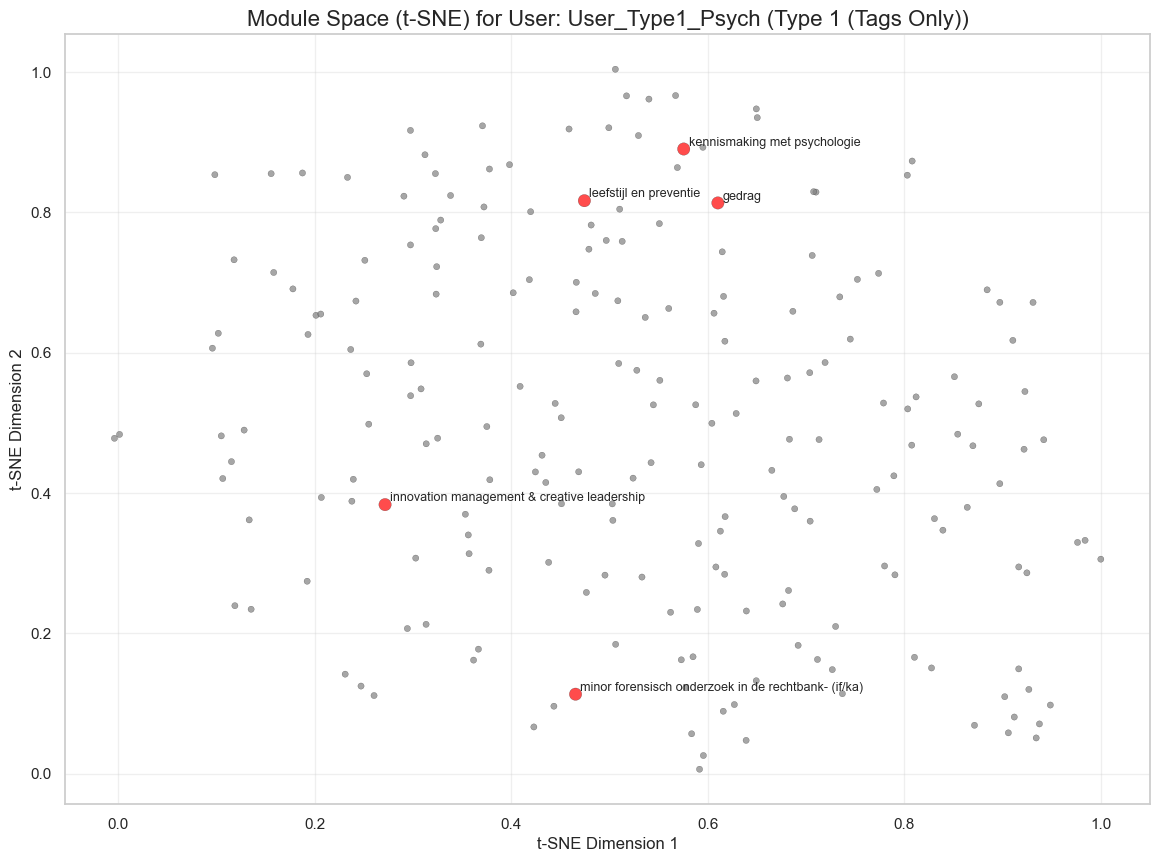

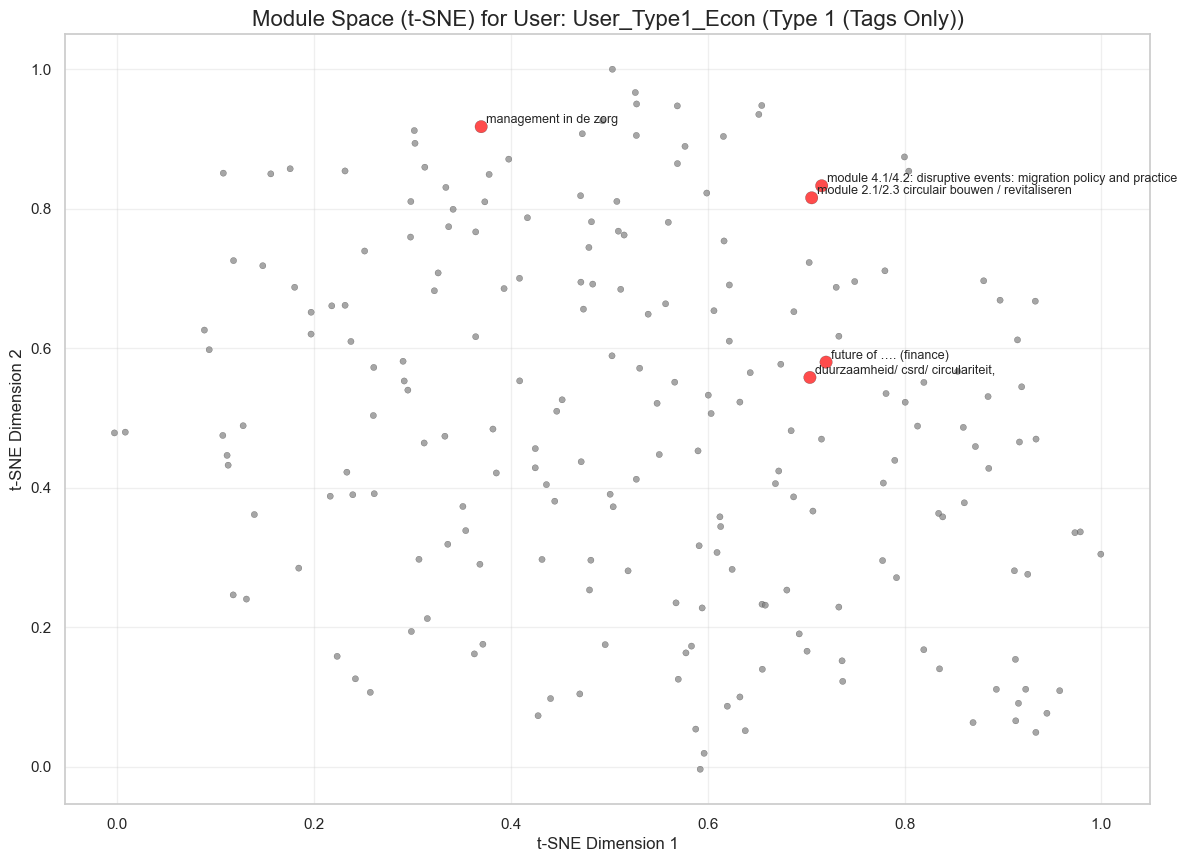

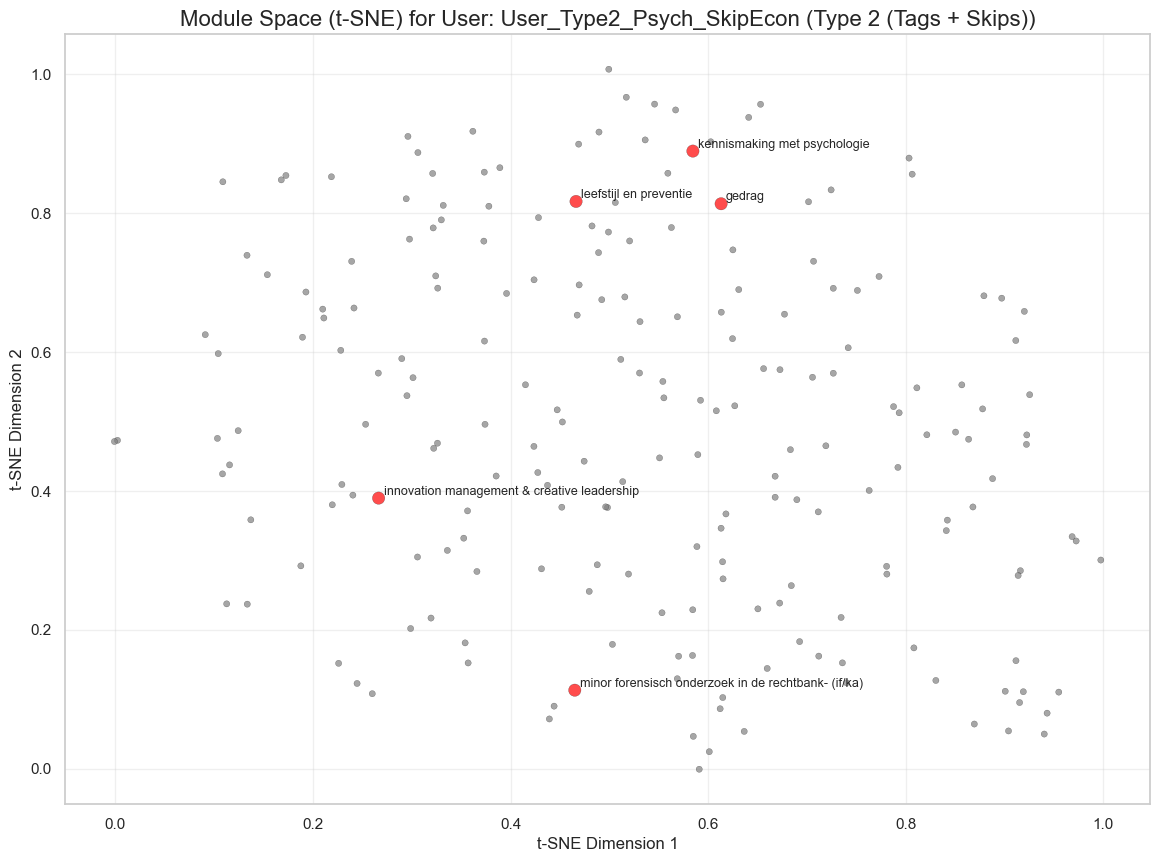

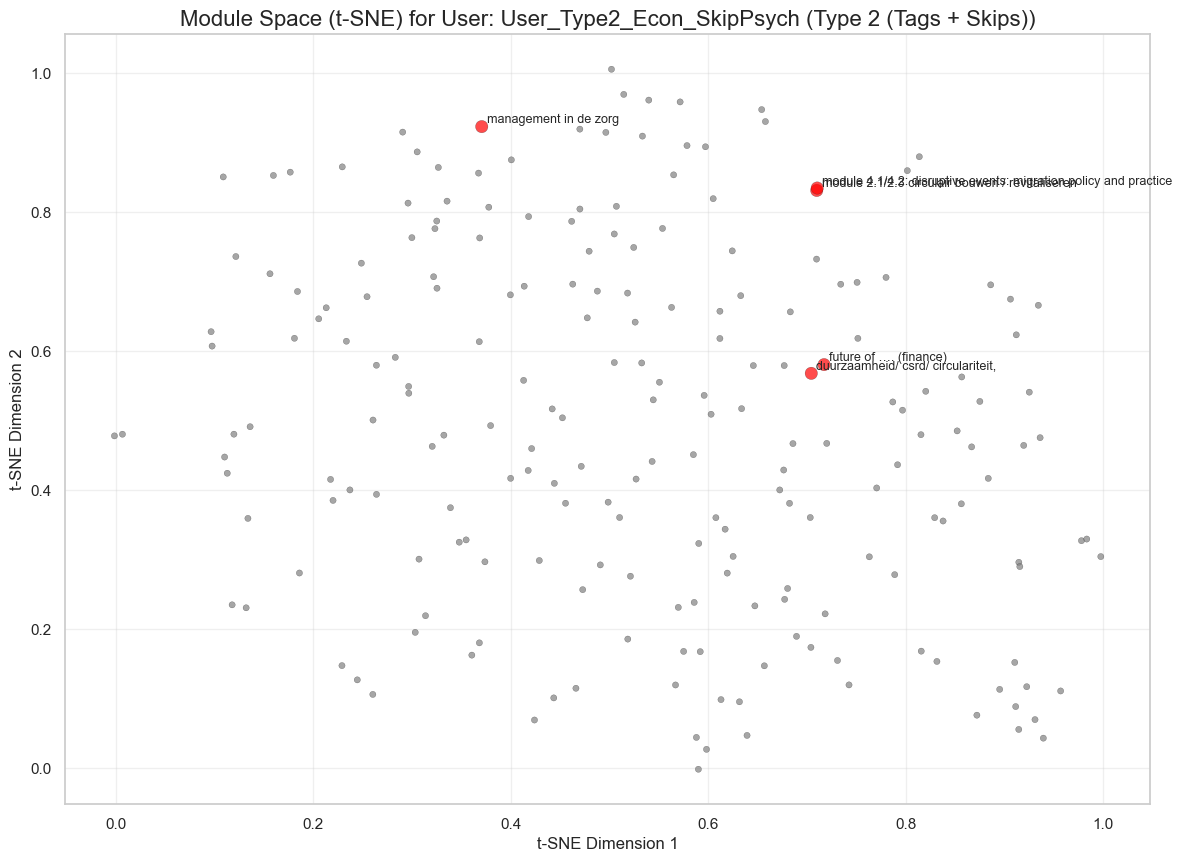

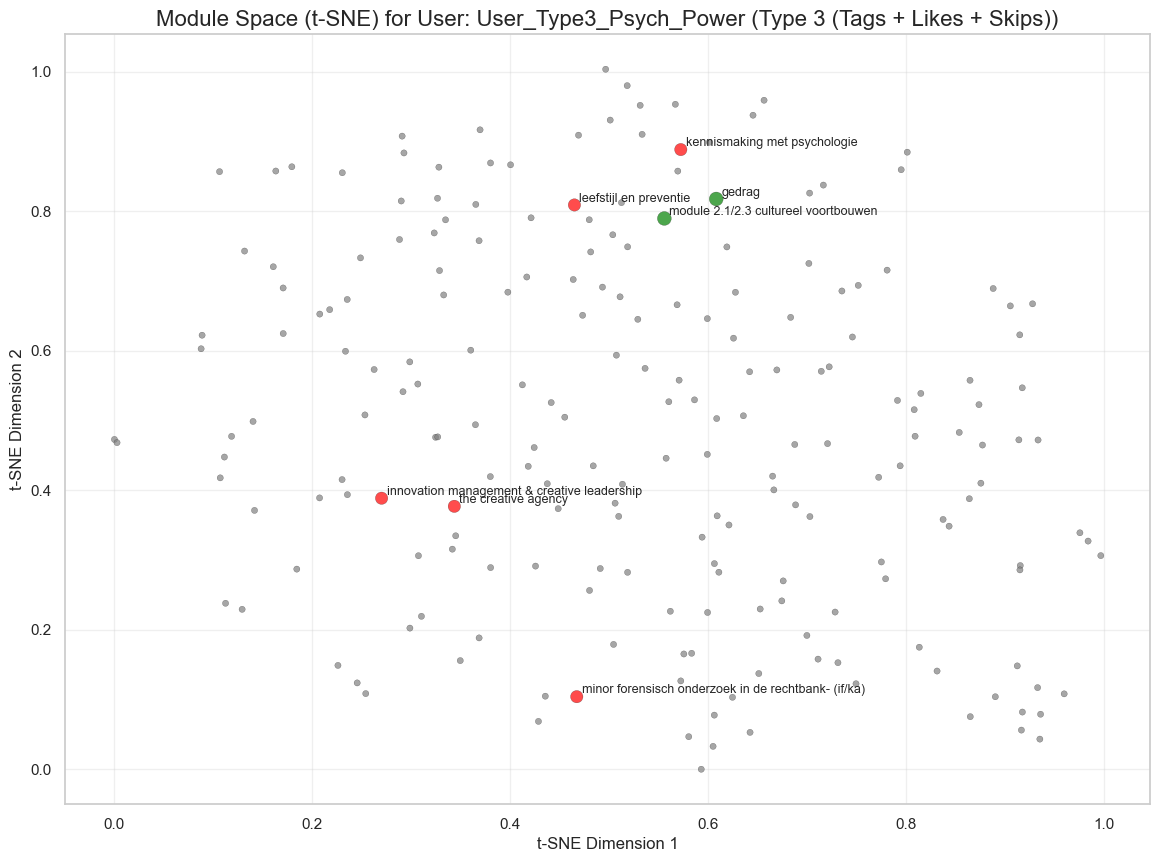

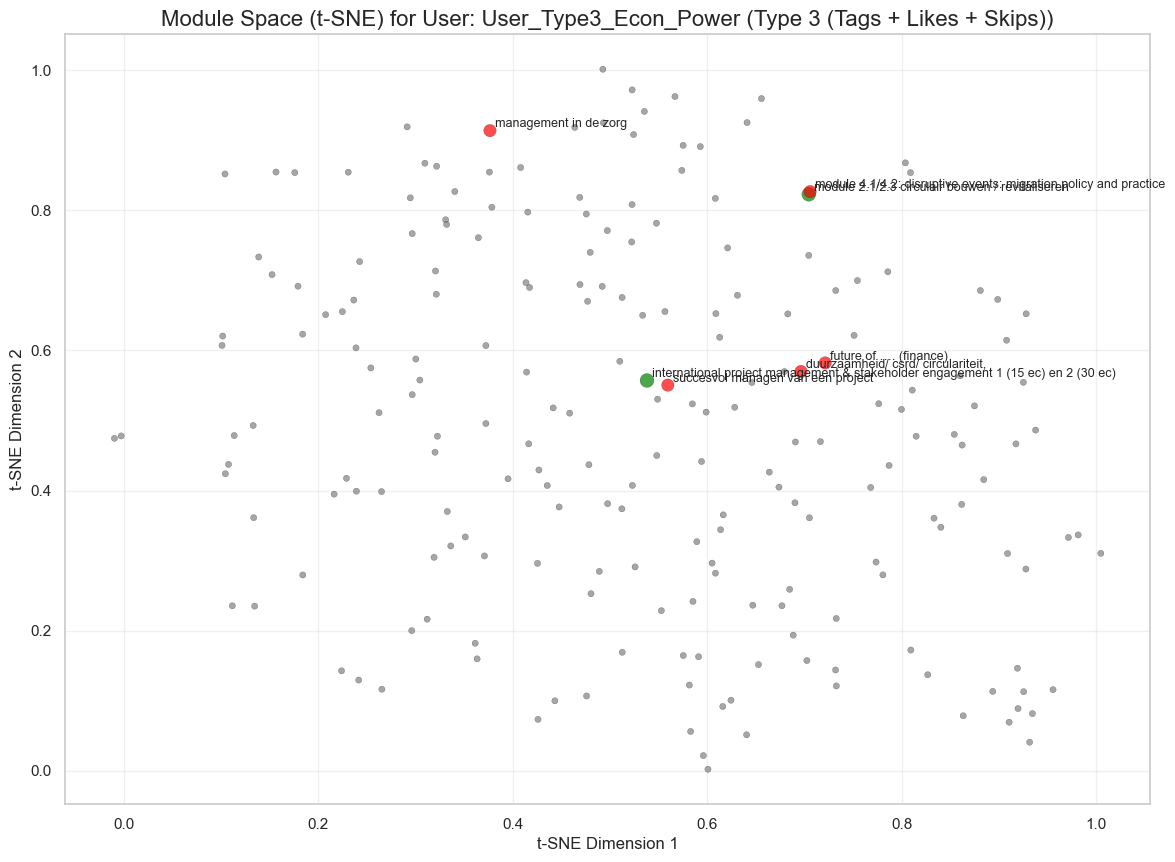

In [425]:

from sklearn.manifold import TSNE

def visualize_user_recommendations_tsne(
    user, df_clean, df_raw, vectorizer, matrix, top_n=5, perplexity=15, learning_rate=200, jitter=0.005
):
    """
    Visualize all modules in 2D using t-SNE, highlighting liked and recommended modules.
    
    Args:
        user: a test_user dictionary
        df: module dataframe
        vectorizer: fitted TF-IDF vectorizer
        matrix: TF-IDF matrix (sparse)
        top_n: number of recommendations
        perplexity: t-SNE perplexity parameter
        learning_rate: t-SNE learning rate
        jitter: small random noise to reduce overlap
    """
    # 1. Compute recommendations
    recs = recommend_to_user(
        user["input"]["favorite_tags"],
        user["input"]["liked_modules"],
        user["input"]["skipped_modules"],
        df_clean,
        df_raw,
        vectorizer,
        matrix,
        top_n=top_n
    )
    recommended_names = [name for name, score in recs]

    # 2. t-SNE embedding
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity, learning_rate=learning_rate)
    reduced = tsne.fit_transform(matrix.toarray())

    # 3. Normalize to 0-1 range
    x = (reduced[:,0] - reduced[:,0].min()) / (reduced[:,0].max() - reduced[:,0].min())
    y = (reduced[:,1] - reduced[:,1].min()) / (reduced[:,1].max() - reduced[:,1].min())

    # 4. Add small jitter to reduce overlap
    x += np.random.normal(0, jitter, size=x.shape)
    y += np.random.normal(0, jitter, size=y.shape)

    # 5. Plotting
    plt.figure(figsize=(14,10))
    colors = []
    sizes = []

    for i, module_name in enumerate(df['name']):
        if module_name in user["input"]["liked_modules"]:
            colors.append('green')
            sizes.append(100)
        elif module_name in recommended_names:
            colors.append('red')
            sizes.append(80)
        else:
            colors.append('gray')
            sizes.append(20)

    plt.scatter(x, y, c=colors, s=sizes, alpha=0.7, edgecolor='k', linewidth=0.2)

    # Annotate liked and recommended modules
    for i, module_name in enumerate(df['name']):
        if module_name in user["input"]["liked_modules"] or module_name in recommended_names:
            plt.text(x[i]+0.005, y[i]+0.005, module_name, fontsize=9)

    plt.title(f"Module Space (t-SNE) for User: {user['id']} ({user['type']})", fontsize=16)
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.grid(alpha=0.3)
    plt.show()


# Example: visualize first test user
for user in test_users:
    visualize_user_recommendations_tsne(user, df_clean, df_raw, vectorizer, matrix, top_n=5)
